In [31]:
import random

# Dictionary to count wins and losses and any potential errors
# Lists for plotting
WinLoss_dict={'Stay_Win':0, 'Swap_Win':0, 'Error' :0}
y_swap = []
y_stay =[]

#Total number of iterations to test for
num_of_iterations = 100000


for iterationCount in range(0,num_of_iterations):  
    
    #randomly pick a prize door. position in the list indicates door number
    door_setup = [1,0,0]
    random.shuffle(door_setup)
        
    #pick a random door. Index is zero based
    first_pick_index = random.choice([0,1,2])        
        
    # Host shows of the two remaining doors, the door with no prize behind it
    if door_setup.index(0) == first_pick_index:
        known_empty_door_index = door_setup.index(0,first_pick_index+1)
    else:
        known_empty_door_index = door_setup.index(0)
    
    # ok. starting with the door setup. 
    # Remove first choice and the known emtpy door
    second_pick_index = [0,1,2]
    second_pick_index.remove(first_pick_index)
    second_pick_index.remove(known_empty_door_index)
    second_pick_index = second_pick_index[0]
    
    if door_setup[first_pick_index] == 1:
        WinLoss_dict['Stay_Win'] += 1 
    if door_setup[second_pick_index] == 1:
        WinLoss_dict['Swap_Win'] += 1  
    # Use this 3rd condition to track errors
    if (door_setup[first_pick_index] == 0) & (door_setup[second_pick_index] == 0) :
        WinLoss_dict['Error'] +=1
        print('error')
        
    y_swap.append(WinLoss_dict['Swap_Win'])
    y_stay.append(WinLoss_dict['Stay_Win'])   
    
#    #Diagnostic  print
#     print(door_setup,'f:',first_pick_index,'k:',known_empty_door_index,'s:',second_pick_index)

In [38]:
WinLoss_dict

{'Stay_Win': 33509, 'Swap_Win': 66491, 'Error': 0}

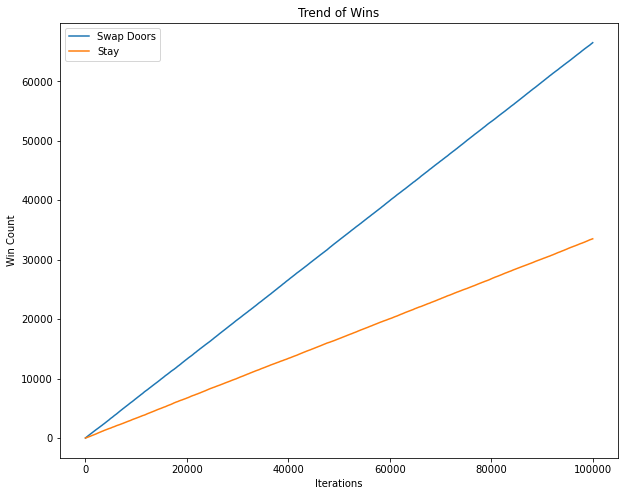

In [40]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,num_of_iterations,1)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(x,y_swap)
ax.plot(x,y_stay)

ax.set_xlabel('Iterations')
ax.set_ylabel('Win Count')
ax.set_title('Trend of Wins')
ax.legend(['Swap Doors', 'Stay']);